In [17]:
import pandas as pd
import numpy as np
import re
from plotnine import *
import sys
import warnings
warnings.filterwarnings("ignore")

In [19]:
filename = 'C:/Users/rlath/dataitgirls/Next_Hip_Place/code/seoul_populations/data/year_population.csv'
df_popu = pd.read_csv(filename).drop('Unnamed: 0', axis=1)
df_popu.head()

,기간,자치구,동,세대,계_계,계_남,계_여,한국인_계,한국인_남,한국인_여,외국인_계,외국인_남,외국인_여,세대당인구,65세이상고령자
0,2008,합계,합계,"4,097,562","10,456,034","5,184,732","5,271,302","10,200,827","5,061,809","5,139,018","255,207","122,923","132,284",2.49,"898,700"
1,2008,종로구,소계,"74,660","179,754","89,725","90,029","170,705","85,398","85,307","9,049","4,327","4,722",2.29,"20,162"
2,2008,종로구,사직동,"4,400","10,451","4,941","5,510","9,943","4,683","5,260",508,258,250,2.26,"1,368"
3,2008,종로구,삼청동,"1,684","3,801","1,850","1,951","3,671","1,777","1,894",130,73,57,2.18,589
4,2008,종로구,부암동,"4,607","11,933","5,904","6,029","11,588","5,747","5,841",345,157,188,2.52,"1,433"


In [20]:
df_move = pd.read_csv('data/seoul_in_out_total_abs.csv')
df_move.head()

,기간,자치구,동,총전입,총전출,구내전입,구내전출,구간전입,구간전출,시/도간전입,시/도간전출
0,2009,합계,합계,1873188,1925452,560864,560864,725991,725991,586333,638597
1,2009,종로구,소계,31031,33661,5921,5921,15157,18036,9953,9704
2,2009,종로구,사직동,2140,2076,448,402,1087,1160,605,514
3,2009,종로구,삼청동,694,808,137,191,317,402,240,215
4,2009,종로구,부암동,1925,2180,477,483,945,1100,503,597


In [22]:
df_move['시내전입'] = df_move['구내전입'].values + df_move['구간전입'].values
df_move['시내전출'] = df_move['구내전출'].values + df_move['구간전출'].values
df_move['시내 전입+전출'] = df_move['시내전입'].values + df_move['시내전출'].values
df_move['구내 전입+전출'] = df_move['구내전입'].values + df_move['구내전출'].values
df_move['구간 전입+전출'] = df_move['구간전입'].values + df_move['구간전출'].values
df_move.head()

,기간,자치구,동,총전입,총전출,구내전입,구내전출,구간전입,구간전출,시/도간전입,시/도간전출,시내전입,시내전출,시내 전입+전출,구내 전입+전출,구간 전입+전출
0,2009,합계,합계,1873188,1925452,560864,560864,725991,725991,586333,638597,1286855,1286855,2573710,1121728,1451982
1,2009,종로구,소계,31031,33661,5921,5921,15157,18036,9953,9704,21078,23957,45035,11842,33193
2,2009,종로구,사직동,2140,2076,448,402,1087,1160,605,514,1535,1562,3097,850,2247
3,2009,종로구,삼청동,694,808,137,191,317,402,240,215,454,593,1047,328,719
4,2009,종로구,부암동,1925,2180,477,483,945,1100,503,597,1422,1583,3005,960,2045


In [ ]:
active = df_move['기간,자치구,동,시내 전입+전출,구내전출,구간전입,구간전출'.split(',')]

In [ ]:
inner_move = df_move['기간,자치구,동,구내전입,구내전출,구간전입,구간전출'.split(',')]
inner_move.head()

In [171]:
inner_move['시내전입'] = inner_move['구내전입'].values + inner_move['구간전입'].values
inner_move['시내전출'] = inner_move['구내전출'].values + inner_move['구간전출'].values
inner_move['시내 전입-전출'] = inner_move['시내전입'].values - inner_move['시내전출'].values
inner_move['구내 전입-전출'] = inner_move['구내전입'].values - inner_move['구내전출'].values
inner_move['구간 전입-전출'] = inner_move['구간전입'].values - inner_move['구간전출'].values
inner_move.head()

C:\Users\rlath\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rlath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rlath\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,기간,자치구,동,구내전입,구내전출,구간전입,구간전출,시내전입,시내전출,시내 전입-전출,구내 전입-전출,구간 전입-전출
0,2009,합계,합계,560864,560864,725991,725991,1286855,1286855,0,0,0
1,2009,종로구,소계,5921,5921,15157,18036,21078,23957,-2879,0,-2879
2,2009,종로구,사직동,448,402,1087,1160,1535,1562,-27,46,-73
3,2009,종로구,삼청동,137,191,317,402,454,593,-139,-54,-85
4,2009,종로구,부암동,477,483,945,1100,1422,1583,-161,-6,-155


In [172]:
inner_move.columns

Index(['기간', '자치구', '동', '구내전입', '구내전출', '구간전입', '구간전출', '시내전입', '시내전출',
       '시내 전입-전출', '구내 전입-전출', '구간 전입-전출'],
      dtype='object')

In [173]:
inner_move = inner_move[['기간', '자치구', '동', '시내전입', '시내전출', '시내 전입-전출', '구내전입',
                         '구내전출', '구내 전입-전출', '구간전입', '구간전출', '구간 전입-전출']]
inner_move.head()

,기간,자치구,동,시내전입,시내전출,시내 전입-전출,구내전입,구내전출,구내 전입-전출,구간전입,구간전출,구간 전입-전출
0,2009,합계,합계,1286855,1286855,0,560864,560864,0,725991,725991,0
1,2009,종로구,소계,21078,23957,-2879,5921,5921,0,15157,18036,-2879
2,2009,종로구,사직동,1535,1562,-27,448,402,46,1087,1160,-73
3,2009,종로구,삼청동,454,593,-139,137,191,-54,317,402,-85
4,2009,종로구,부암동,1422,1583,-161,477,483,-6,945,1100,-155


In [174]:
df_popu[df_popu['기간'] == 2008]

,기간,자치구,동,세대,계_계,계_남,계_여,한국인_계,한국인_남,한국인_여,외국인_계,외국인_남,외국인_여,세대당인구,65세이상고령자
0,2008,합계,합계,"4,097,562","10,456,034","5,184,732","5,271,302","10,200,827","5,061,809","5,139,018","255,207","122,923","132,284",2.49,"898,700"
1,2008,종로구,소계,"74,660","179,754","89,725","90,029","170,705","85,398","85,307","9,049","4,327","4,722",2.29,"20,162"
2,2008,종로구,사직동,"4,400","10,451","4,941","5,510","9,943","4,683","5,260",508,258,250,2.26,"1,368"
3,2008,종로구,삼청동,"1,684","3,801","1,850","1,951","3,671","1,777","1,894",130,73,57,2.18,589
4,2008,종로구,부암동,"4,607","11,933","5,904","6,029","11,588","5,747","5,841",345,157,188,2.52,"1,433"
5,2008,종로구,평창동,"7,068","19,757","9,620","10,137","19,353","9,424","9,929",404,196,208,2.74,"2,291"
6,2008,종로구,무악동,"3,161","8,693","4,224","4,469","8,607","4,189","4,418",86,35,51,2.72,884
7,2008,종로구,교남동,"4,394","9,407","4,595","4,812","9,163","4,484","4,679",244,111,133,2.09,"1,106"
8,2008,종로구,가회동,"2,510","6,044","2,910","3,134","5,850","2,825","3,025",194,85,109,2.33,800
9,2008,종로구,종로1.2.3.4가동,"4,437","8,645","4,852","3,793","7,242","4,105","3,137","1,403",747,656,1.63,"1,247"


In [175]:
df_popu = df_popu.iloc[464:,:].reset_index().drop('index', axis=1)
df_popu.head()

,기간,자치구,동,세대,계_계,계_남,계_여,한국인_계,한국인_남,한국인_여,외국인_계,외국인_남,외국인_여,세대당인구,65세이상고령자
0,2009,합계,합계,"4,116,660","10,464,051","5,181,359","5,282,692","10,208,302","5,059,269","5,149,033","255,749","122,090","133,659",2.48,"942,946"
1,2009,종로구,소계,"74,315","177,543","88,432","89,111","168,603","84,257","84,346","8,940","4,175","4,765",2.27,"20,753"
2,2009,종로구,사직동,"4,476","10,464","4,945","5,519","10,029","4,732","5,297",435,213,222,2.24,"1,389"
3,2009,종로구,삼청동,"1,630","3,717","1,811","1,906","3,548","1,715","1,833",169,96,73,2.18,568
4,2009,종로구,부암동,"4,508","11,602","5,744","5,858","11,330","5,627","5,703",272,117,155,2.51,"1,448"


In [176]:
total_popu = df_popu.iloc[:, :5].drop('세대', axis=1)
total_popu.head()

,기간,자치구,동,계_계
0,2009,합계,합계,"10,464,051"
1,2009,종로구,소계,"177,543"
2,2009,종로구,사직동,"10,464"
3,2009,종로구,삼청동,"3,717"
4,2009,종로구,부암동,"11,602"


In [177]:
total_popu = total_popu.rename(columns={'계_계' : '인구'})
total_popu.head()

,기간,자치구,동,인구
0,2009,합계,합계,"10,464,051"
1,2009,종로구,소계,"177,543"
2,2009,종로구,사직동,"10,464"
3,2009,종로구,삼청동,"3,717"
4,2009,종로구,부암동,"11,602"


In [178]:
total_popu['인구'] = total_popu['인구'].apply(lambda x: x.replace(',', ''))
total_popu['인구'] = total_popu['인구'].astype(int)
total_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4059 entries, 0 to 4058
Data columns (total 4 columns):
기간     4059 non-null int64
자치구    4059 non-null object
동      4059 non-null object
인구     4059 non-null int32
dtypes: int32(1), int64(1), object(2)
memory usage: 111.1+ KB


In [179]:
total_popu.head()

,기간,자치구,동,인구
0,2009,합계,합계,10464051
1,2009,종로구,소계,177543
2,2009,종로구,사직동,10464
3,2009,종로구,삼청동,3717
4,2009,종로구,부암동,11602


In [180]:
inner_move = inner_move.merge(total_popu, how='left')
inner_move.head()

,기간,자치구,동,시내전입,시내전출,시내 전입-전출,구내전입,구내전출,구내 전입-전출,구간전입,구간전출,구간 전입-전출,인구
0,2009,합계,합계,1286855,1286855,0,560864,560864,0,725991,725991,0,10464051.0
1,2009,종로구,소계,21078,23957,-2879,5921,5921,0,15157,18036,-2879,177543.0
2,2009,종로구,사직동,1535,1562,-27,448,402,46,1087,1160,-73,10464.0
3,2009,종로구,삼청동,454,593,-139,137,191,-54,317,402,-85,3717.0
4,2009,종로구,부암동,1422,1583,-161,477,483,-6,945,1100,-155,11602.0


In [181]:
inner_move = inner_move[['기간', '자치구', '동', '인구', '시내전입', '시내전출', '시내 전입-전출', '구내전입',
                         '구내전출', '구내 전입-전출','구간전입', '구간전출', '구간 전입-전출']]
inner_move.head()

,기간,자치구,동,인구,시내전입,시내전출,시내 전입-전출,구내전입,구내전출,구내 전입-전출,구간전입,구간전출,구간 전입-전출
0,2009,합계,합계,10464051.0,1286855,1286855,0,560864,560864,0,725991,725991,0
1,2009,종로구,소계,177543.0,21078,23957,-2879,5921,5921,0,15157,18036,-2879
2,2009,종로구,사직동,10464.0,1535,1562,-27,448,402,46,1087,1160,-73
3,2009,종로구,삼청동,3717.0,454,593,-139,137,191,-54,317,402,-85
4,2009,종로구,부암동,11602.0,1422,1583,-161,477,483,-6,945,1100,-155


In [182]:
move_rate = inner_move.copy(deep=True)
move_rate.head()

,기간,자치구,동,인구,시내전입,시내전출,시내 전입-전출,구내전입,구내전출,구내 전입-전출,구간전입,구간전출,구간 전입-전출
0,2009,합계,합계,10464051.0,1286855,1286855,0,560864,560864,0,725991,725991,0
1,2009,종로구,소계,177543.0,21078,23957,-2879,5921,5921,0,15157,18036,-2879
2,2009,종로구,사직동,10464.0,1535,1562,-27,448,402,46,1087,1160,-73
3,2009,종로구,삼청동,3717.0,454,593,-139,137,191,-54,317,402,-85
4,2009,종로구,부암동,11602.0,1422,1583,-161,477,483,-6,945,1100,-155


In [183]:
move_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4047 entries, 0 to 4046
Data columns (total 13 columns):
기간          4047 non-null int64
자치구         4047 non-null object
동           4047 non-null object
인구          4044 non-null float64
시내전입        4047 non-null int64
시내전출        4047 non-null int64
시내 전입-전출    4047 non-null int64
구내전입        4047 non-null int64
구내전출        4047 non-null int64
구내 전입-전출    4047 non-null int64
구간전입        4047 non-null int64
구간전출        4047 non-null int64
구간 전입-전출    4047 non-null int64
dtypes: float64(1), int64(10), object(2)
memory usage: 442.6+ KB


In [184]:
cols = ['시내전입', '시내전출', '시내 전입-전출', '구내전입', '구내전출', '구내 전입-전출', '구간전입', '구간전출', '구간 전입-전출']
cols

['시내전입',
 '시내전출',
 '시내 전입-전출',
 '구내전입',
 '구내전출',
 '구내 전입-전출',
 '구간전입',
 '구간전출',
 '구간 전입-전출']

In [185]:
for col in cols:
    move_rate[f'{col}비율(%)'] = (move_rate[col].values * 100) /move_rate['인구'].values
move_rate.head()

,기간,자치구,동,인구,시내전입,시내전출,시내 전입-전출,구내전입,구내전출,구내 전입-전출,...,구간 전입-전출,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
0,2009,합계,합계,10464051.0,1286855,1286855,0,560864,560864,0,...,0,12.297866,12.297866,0.000000,5.359913,5.359913,0.000000,6.937954,6.937954,0.000000
1,2009,종로구,소계,177543.0,21078,23957,-2879,5921,5921,0,...,-2879,11.872054,13.493633,-1.621579,3.334967,3.334967,0.000000,8.537087,10.158666,-1.621579
2,2009,종로구,사직동,10464.0,1535,1562,-27,448,402,46,...,-73,14.669343,14.927370,-0.258028,4.281346,3.841743,0.439602,10.387997,11.085627,-0.697630
3,2009,종로구,삼청동,3717.0,454,593,-139,137,191,-54,...,-85,12.214151,15.953726,-3.739575,3.685768,5.138553,-1.452785,8.528383,10.815174,-2.286790
4,2009,종로구,부암동,11602.0,1422,1583,-161,477,483,-6,...,-155,12.256507,13.644199,-1.387692,4.111360,4.163075,-0.051715,8.145147,9.481124,-1.335977


In [186]:
move_rate_only = move_rate.drop(cols, axis=1).copy(deep=1)
move_rate_only.head()

,기간,자치구,동,인구,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
0,2009,합계,합계,10464051.0,12.297866,12.297866,0.000000,5.359913,5.359913,0.000000,6.937954,6.937954,0.000000
1,2009,종로구,소계,177543.0,11.872054,13.493633,-1.621579,3.334967,3.334967,0.000000,8.537087,10.158666,-1.621579
2,2009,종로구,사직동,10464.0,14.669343,14.927370,-0.258028,4.281346,3.841743,0.439602,10.387997,11.085627,-0.697630
3,2009,종로구,삼청동,3717.0,12.214151,15.953726,-3.739575,3.685768,5.138553,-1.452785,8.528383,10.815174,-2.286790
4,2009,종로구,부암동,11602.0,12.256507,13.644199,-1.387692,4.111360,4.163075,-0.051715,8.145147,9.481124,-1.335977


In [187]:
move_rate.tail()

,기간,자치구,동,인구,시내전입,시내전출,시내 전입-전출,구내전입,구내전출,구내 전입-전출,...,구간 전입-전출,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
4042,2017,강동구,둔촌1동,1997.0,654,14000,-13346,201,7454,-7253,...,-6093,32.749124,701.051577,-668.302454,10.065098,373.259890,-363.194792,22.684026,327.791688,-305.107661
4043,2017,강동구,둔촌2동,28920.0,3600,2672,928,2577,1578,999,...,-71,12.448133,9.239281,3.208852,8.910788,5.456432,3.454357,3.537344,3.782849,-0.245505
4044,2017,강동구,암사1동,38434.0,4686,3591,1095,3125,2546,579,...,516,12.192330,9.343290,2.849040,8.130822,6.624343,1.506479,4.061508,2.718947,1.342561
4045,2017,강동구,천호2동,36691.0,4762,3820,942,2679,2328,351,...,591,12.978660,10.411273,2.567387,7.301518,6.344880,0.956638,5.677142,4.066392,1.610749
4046,2017,강동구,길동,50423.0,5362,5311,51,3498,3430,68,...,-17,10.634036,10.532892,0.101144,6.937310,6.802451,0.134859,3.696726,3.730440,-0.033715


In [189]:
move_rate_only[move_rate_only['동'] == '연남동']

,기간,자치구,동,인구,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
230,2009,마포구,연남동,20701.0,13.728805,14.574175,-0.845370,5.574610,6.284721,-0.710111,8.154195,8.289455,-0.135259
680,2010,마포구,연남동,20777.0,13.153968,14.434230,-1.280262,5.236560,6.247293,-1.010733,7.917409,8.186937,-0.269529
1130,2011,마포구,연남동,20471.0,12.769283,14.034488,-1.265204,5.436960,6.003615,-0.566655,7.332324,8.030873,-0.698549
1579,2012,마포구,연남동,20202.0,12.266112,13.468963,-1.202851,5.410355,5.454905,-0.044550,6.855757,8.014058,-1.158301
2028,2013,마포구,연남동,20155.0,12.076408,11.902754,0.173654,4.926817,4.475316,0.451501,7.149591,7.427437,-0.277847
2477,2014,마포구,연남동,19753.0,10.990736,13.213183,-2.222447,4.652458,5.538399,-0.885941,6.338278,7.674784,-1.336506
2926,2015,마포구,연남동,19157.0,11.546693,14.631727,-3.085034,4.724122,5.407945,-0.683823,6.822571,9.223782,-2.401211
3376,2016,마포구,연남동,18592.0,10.595955,14.393287,-3.797332,4.458907,4.959122,-0.500215,6.137048,9.434165,-3.297117
3826,2017,마포구,연남동,17803.0,10.222996,14.272875,-4.049879,4.167837,5.178902,-1.011066,6.055159,9.093973,-3.038814


In [201]:
move_rate_only[move_rate_only['동'] == '종로1.2.3.4가동']

,기간,자치구,동,인구,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
9,2009,종로구,종로1.2.3.4가동,8575.0,13.399417,14.390671,-0.991254,2.320700,2.542274,-0.221574,11.078717,11.848397,-0.769679
459,2010,종로구,종로1.2.3.4가동,9155.0,12.211906,13.391589,-1.179683,2.501365,2.315674,0.185691,9.710541,11.075915,-1.365374
909,2011,종로구,종로1.2.3.4가동,9210.0,12.366992,13.365907,-0.998914,2.052117,2.475570,-0.423453,10.314875,10.890337,-0.575461
1359,2012,종로구,종로1.2.3.4가동,8984.0,11.398041,12.488869,-1.090828,2.003562,2.571238,-0.567676,9.394479,9.917631,-0.523152
1808,2013,종로구,종로1.2.3.4가동,8797.0,11.617597,13.004433,-1.386836,2.080255,2.478118,-0.397863,9.537342,10.526316,-0.988974
2257,2014,종로구,종로1.2.3.4가동,8920.0,11.188341,13.677130,-2.488789,2.130045,2.511211,-0.381166,9.058296,11.165919,-2.107623
2706,2015,종로구,종로1.2.3.4가동,8786.0,11.438652,14.193034,-2.754382,2.094241,3.266560,-1.172320,9.344412,10.926474,-1.582062
3156,2016,종로구,종로1.2.3.4가동,8727.0,11.275352,14.025438,-2.750086,1.466713,2.864673,-1.397960,9.808640,11.160765,-1.352126
3606,2017,종로구,종로1.2.3.4가동,8592.0,10.393389,13.198324,-2.804935,1.582868,3.072626,-1.489758,8.810521,10.125698,-1.315177


In [202]:
move_rate_only['시내 전입-전출비율(%)'].describe()

count    4044.000000
mean       -0.504942
std        12.099962
min      -668.302454
25%        -1.269834
50%        -0.389746
75%         0.450736
max        88.522750
Name: 시내 전입-전출비율(%), dtype: float64

In [197]:
move_rate_only[move_rate_only['동'] == '망원2동']

,기간,자치구,동,인구,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
229,2009,마포구,망원2동,22139.0,13.573332,11.725914,1.847419,7.642622,5.894575,1.748046,5.930711,5.831338,0.099372
679,2010,마포구,망원2동,21907.0,11.927694,12.416123,-0.488428,6.719313,6.445428,0.273885,5.208381,5.970694,-0.762313
1129,2011,마포구,망원2동,21729.0,11.376501,11.183211,0.193290,6.447605,5.517971,0.929633,4.928897,5.665240,-0.736343
1578,2012,마포구,망원2동,21350.0,9.943794,10.318501,-0.374707,6.046838,5.039813,1.007026,3.896956,5.278689,-1.381733
2027,2013,마포구,망원2동,21082.0,10.857604,11.104260,-0.246656,6.270752,5.582962,0.687791,4.586851,5.521298,-0.934446
2476,2014,마포구,망원2동,21071.0,11.318874,10.488349,0.830525,7.033363,5.471976,1.561388,4.285511,5.016373,-0.730862
2925,2015,마포구,망원2동,20809.0,11.288385,11.711279,-0.422894,7.035417,5.737902,1.297515,4.252967,5.973377,-1.720409
3375,2016,마포구,망원2동,20494.0,10.827559,11.247194,-0.419635,6.958134,5.484532,1.473602,3.869425,5.762662,-1.893237
3825,2017,마포구,망원2동,20017.0,8.742569,9.791677,-1.049108,5.040715,4.890843,0.149873,3.701853,4.900834,-1.198981


In [196]:
move_rate_only[move_rate_only['동'] == '망원1동']

,기간,자치구,동,인구,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
228,2009,마포구,망원1동,24909.0,13.216107,13.308443,-0.092336,7.386888,6.901120,0.485768,5.829218,6.407323,-0.578104
678,2010,마포구,망원1동,25114.0,13.056463,13.239627,-0.183165,7.067771,7.390300,-0.322529,5.988692,5.849327,0.139364
1128,2011,마포구,망원1동,24867.0,13.073551,13.540033,-0.466482,7.254594,7.045482,0.209112,5.818957,6.494551,-0.675594
1577,2012,마포구,망원1동,24534.0,11.738811,11.914078,-0.175267,6.460422,5.808266,0.652156,5.278389,6.105812,-0.827423
2026,2013,마포구,망원1동,24174.0,11.764706,11.512369,0.252337,6.767602,5.803756,0.963845,4.997104,5.708613,-0.711508
2475,2014,마포구,망원1동,23402.0,11.097342,14.024442,-2.927100,6.413982,7.666011,-1.252030,4.683360,6.358431,-1.675071
2924,2015,마포구,망원1동,22751.0,12.118149,14.408158,-2.290009,7.081007,7.507362,-0.426355,5.037141,6.900796,-1.863654
3374,2016,마포구,망원1동,22292.0,11.824870,13.031581,-1.206711,6.989054,6.423829,0.565225,4.835816,6.607752,-1.771936
3824,2017,마포구,망원1동,21790.0,10.711335,11.872419,-1.161083,5.810005,5.635613,0.174392,4.901331,6.236806,-1.335475


In [195]:
move_rate_only[move_rate_only['동'] == '사직동']

,기간,자치구,동,인구,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
2,2009,종로구,사직동,10464.0,14.669343,14.927370,-0.258028,4.281346,3.841743,0.439602,10.387997,11.085627,-0.697630
452,2010,종로구,사직동,10668.0,13.592051,15.504312,-1.912261,4.058868,4.171354,-0.112486,9.533183,11.332958,-1.799775
902,2011,종로구,사직동,10602.0,14.280324,15.280136,-0.999811,4.404829,4.593473,-0.188644,9.875495,10.686663,-0.811168
1352,2012,종로구,사직동,10477.0,12.780376,13.496230,-0.715854,3.961058,3.980147,-0.019089,8.819319,9.516083,-0.696764
1801,2013,종로구,사직동,10327.0,11.949259,13.072528,-1.123269,3.931442,3.486008,0.445434,8.017817,9.586521,-1.568703
2250,2014,종로구,사직동,10132.0,11.942361,13.452428,-1.510067,3.720884,3.553099,0.167785,8.221477,9.899329,-1.677852
2699,2015,종로구,사직동,10033.0,12.568524,13.894149,-1.325625,2.930330,3.628028,-0.697698,9.638194,10.266122,-0.627928
3149,2016,종로구,사직동,10013.0,12.164187,12.873265,-0.709078,2.896235,3.006092,-0.109857,9.267952,9.867173,-0.599221
3599,2017,종로구,사직동,9717.0,12.493568,15.539776,-3.046208,3.241741,5.320572,-2.078831,9.251827,10.219203,-0.967377


In [194]:
move_rate_only[move_rate_only['동'] == '을지로동']

,기간,자치구,동,인구,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
27,2009,중구,을지로동,2045.0,16.870416,15.354523,1.515892,2.396088,2.493888,-0.097800,14.474328,12.860636,1.613692
477,2010,중구,을지로동,2123.0,12.812058,17.333961,-4.521903,1.931229,3.532737,-1.601507,10.880829,13.801225,-2.920396
927,2011,중구,을지로동,2145.0,12.400932,11.515152,0.885781,1.818182,1.631702,0.186480,10.582751,9.883450,0.699301
1376,2012,중구,을지로동,2074.0,11.282546,12.921890,-1.639344,1.301832,2.073288,-0.771456,9.980714,10.848602,-0.867888
1825,2013,중구,을지로동,2022.0,9.545005,11.721068,-2.176063,1.829871,1.483680,0.346192,7.715134,10.237389,-2.522255
2274,2014,중구,을지로동,1920.0,10.312500,13.802083,-3.489583,1.875000,1.979167,-0.104167,8.437500,11.822917,-3.385417
2723,2015,중구,을지로동,1854.0,12.621359,13.969795,-1.348436,1.887810,2.265372,-0.377562,10.733549,11.704423,-0.970874
3173,2016,중구,을지로동,1826.0,12.705367,14.019715,-1.314348,2.409639,2.519168,-0.109529,10.295728,11.500548,-1.204819
3623,2017,중구,을지로동,1786.0,11.366181,13.997760,-2.631579,1.679731,1.959686,-0.279955,9.686450,12.038074,-2.351624


In [190]:
move_rate_only[move_rate_only['동'] == '오륜동']

,기간,자치구,동,인구,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
413,2009,송파구,오륜동,20967.0,10.840845,12.324128,-1.483283,3.796442,5.227262,-1.430820,7.044403,7.096867,-0.052463
863,2010,송파구,오륜동,20706.0,9.050517,9.963296,-0.912779,3.684922,4.269294,-0.584372,5.365595,5.694002,-0.328407
1313,2011,송파구,오륜동,20610.0,9.820475,10.446385,-0.625910,3.556526,4.711305,-1.154779,6.263950,5.735080,0.528869
1762,2012,송파구,오륜동,20394.0,8.365205,9.051682,-0.686476,3.481416,4.010984,-0.529568,4.883789,5.040698,-0.156909
2211,2013,송파구,오륜동,20316.0,8.736956,8.766489,-0.029533,3.617838,3.893483,-0.275645,5.119118,4.873006,0.246111
2660,2014,송파구,오륜동,20114.0,8.337476,9.093169,-0.755693,3.713831,4.201054,-0.487223,4.623645,4.892115,-0.268470
3109,2015,송파구,오륜동,19999.0,7.970399,8.835442,-0.865043,3.395170,4.115206,-0.720036,4.575229,4.720236,-0.145007
3559,2016,송파구,오륜동,19714.0,8.349396,9.003754,-0.654357,3.510196,4.580501,-1.070305,4.839201,4.423253,0.415948
4009,2017,송파구,오륜동,19562.0,8.582967,8.818117,-0.235150,2.724670,4.017994,-1.293324,5.858297,4.800123,1.058174


In [192]:
move_rate_only[move_rate_only['동'] == '대치1동']

,기간,자치구,동,인구,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
387,2009,강남구,대치1동,26907.0,12.636117,13.940610,-1.304493,5.615639,7.351247,-1.735608,7.020478,6.589363,0.431115
837,2010,강남구,대치1동,26825.0,10.661696,12.164026,-1.502330,4.786580,7.310345,-2.523765,5.875116,4.853681,1.021435
1287,2011,강남구,대치1동,21460.0,11.766076,34.156570,-22.390494,5.582479,21.570363,-15.987884,6.183597,12.586207,-6.402610
1736,2012,강남구,대치1동,20603.0,9.552007,12.313741,-2.761734,4.518759,7.154298,-2.635539,5.033248,5.159443,-0.126195
2185,2013,강남구,대치1동,20580.0,10.592809,10.719145,-0.126336,5.379009,6.146744,-0.767736,5.213800,4.572400,0.641399
2634,2014,강남구,대치1동,19804.0,10.972531,14.416280,-3.443749,5.332256,9.174914,-3.842658,5.640275,5.241365,0.398909
3083,2015,강남구,대치1동,23283.0,22.832109,10.312245,12.519864,11.446119,6.502598,4.943521,11.385990,3.809647,7.576343
3533,2016,강남구,대치1동,24834.0,14.230490,9.571555,4.658935,7.127325,5.556898,1.570428,7.103165,4.014657,3.088508
3983,2017,강남구,대치1동,25262.0,11.159053,9.765656,1.393397,5.403373,5.047106,0.356266,5.755680,4.718550,1.037131


In [193]:
move_rate_only[move_rate_only['동'] == '목5동']

,기간,자치구,동,인구,시내전입비율(%),시내전출비율(%),시내 전입-전출비율(%),구내전입비율(%),구내전출비율(%),구내 전입-전출비율(%),구간전입비율(%),구간전출비율(%),구간 전입-전출비율(%)
255,2009,양천구,목5동,47091.0,9.103650,10.624111,-1.520460,2.909261,4.230108,-1.320847,6.194390,6.394003,-0.199614
705,2010,양천구,목5동,46647.0,8.204172,9.481853,-1.277681,2.647544,3.382854,-0.735310,5.556627,6.098999,-0.542371
1155,2011,양천구,목5동,46119.0,8.105119,9.226132,-1.121013,2.565103,3.707799,-1.142696,5.540016,5.518333,0.021683
1604,2012,양천구,목5동,45733.0,7.176437,7.696849,-0.520412,2.302495,2.903811,-0.601316,4.873942,4.793038,0.080904
2053,2013,양천구,목5동,45559.0,7.467240,7.759169,-0.291929,2.129107,3.158542,-1.029434,5.338133,4.600628,0.737505
2502,2014,양천구,목5동,44760.0,7.001787,8.373548,-1.371761,2.004021,2.790438,-0.786416,4.997766,5.583110,-0.585344
2951,2015,양천구,목5동,44545.0,8.036817,8.476821,-0.440004,2.321248,3.207992,-0.886744,5.715569,5.268829,0.446739
3401,2016,양천구,목5동,43987.0,7.122559,8.272899,-1.150340,1.982404,3.057722,-1.075318,5.140155,5.215177,-0.075022
3851,2017,양천구,목5동,43749.0,7.031018,7.981897,-0.950879,2.004617,2.777206,-0.772589,5.026401,5.204690,-0.178290


# 전출 인구만 확인

In [203]:
inner_move.head()

,기간,자치구,동,인구,시내전입,시내전출,시내 전입-전출,구내전입,구내전출,구내 전입-전출,구간전입,구간전출,구간 전입-전출
0,2009,합계,합계,10464051.0,1286855,1286855,0,560864,560864,0,725991,725991,0
1,2009,종로구,소계,177543.0,21078,23957,-2879,5921,5921,0,15157,18036,-2879
2,2009,종로구,사직동,10464.0,1535,1562,-27,448,402,46,1087,1160,-73
3,2009,종로구,삼청동,3717.0,454,593,-139,137,191,-54,317,402,-85
4,2009,종로구,부암동,11602.0,1422,1583,-161,477,483,-6,945,1100,-155


In [324]:
out_only = inner_move.drop('시내전입,시내 전입-전출,구내전입,구내 전입-전출,구간전입,구간 전입-전출'.split(','), axis=1)
out_only.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출
0,2009,합계,합계,10464051.0,1286855,560864,725991
1,2009,종로구,소계,177543.0,23957,5921,18036
2,2009,종로구,사직동,10464.0,1562,402,1160
3,2009,종로구,삼청동,3717.0,593,191,402
4,2009,종로구,부암동,11602.0,1583,483,1100


In [325]:
v11 = out_only[(out_only['기간'] == 2011) & (out_only['동'] != '소계')].iloc[1:,3].values.sum()
out_only.iloc[900,3] = v

v12 = out_only[(out_only['기간'] == 2012) & (out_only['동'] != '소계')].iloc[1:,3].values.sum()
out_only.iloc[1350,3] = v2

v13 = out_only[(out_only['기간'] == 2010) & (out_only['동'] != '소계')].iloc[1:,3].values.sum()
out_only.iloc[450,3] = v13

In [326]:
out_only.isnull().sum()

기간      0
자치구     0
동       0
인구      0
시내전출    0
구내전출    0
구간전출    0
dtype: int64

In [327]:
for col in '시내전출,구내전출,구간전출'.split(','):
    out_only[f'{col}비율(%)'] = (out_only[col].values * 100) / out_only['인구'].values
out_only.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%)
0,2009,합계,합계,10464051.0,1286855,560864,725991,12.297866,5.359913,6.937954
1,2009,종로구,소계,177543.0,23957,5921,18036,13.493633,3.334967,10.158666
2,2009,종로구,사직동,10464.0,1562,402,1160,14.927370,3.841743,11.085627
3,2009,종로구,삼청동,3717.0,593,191,402,15.953726,5.138553,10.815174
4,2009,종로구,부암동,11602.0,1583,483,1100,13.644199,4.163075,9.481124


In [328]:
out_only.isnull().sum()

기간           0
자치구          0
동            0
인구           0
시내전출         0
구내전출         0
구간전출         0
시내전출비율(%)    0
구내전출비율(%)    0
구간전출비율(%)    0
dtype: int64

In [329]:
hots = out_only[out_only['동'].str.contains(r'연남동|사직동|종로1.2.3.4가동|망원[12]동')]
hots.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%)
2,2009,종로구,사직동,10464.0,1562,402,1160,14.927370,3.841743,11.085627
9,2009,종로구,종로1.2.3.4가동,8575.0,1234,218,1016,14.390671,2.542274,11.848397
228,2009,마포구,망원1동,24909.0,3315,1719,1596,13.308443,6.901120,6.407323
229,2009,마포구,망원2동,22139.0,2596,1305,1291,11.725914,5.894575,5.831338
230,2009,마포구,연남동,20701.0,3017,1301,1716,14.574175,6.284721,8.289455


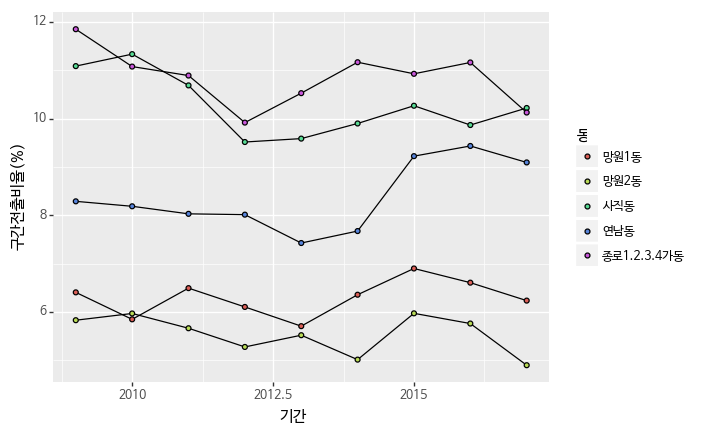

<ggplot: (128150883371)>

In [339]:
(ggplot(hots, aes(x='기간', y='구간전출비율(%)', group='동', fill='동'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

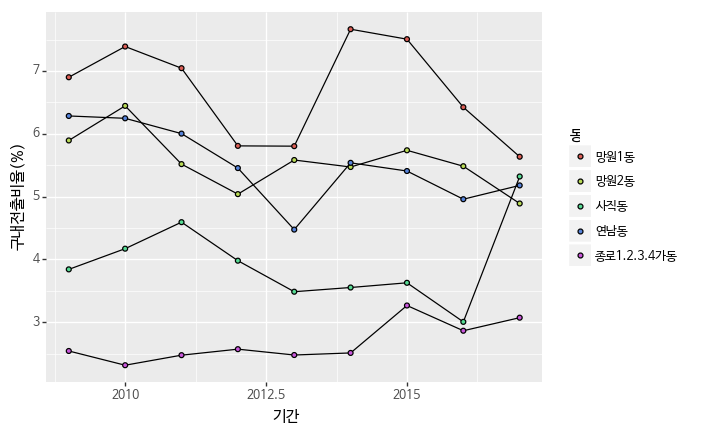

<ggplot: (-9223371908704321946)>

In [340]:
(ggplot(hots, aes(x='기간', y='구내전출비율(%)', group='동', fill='동'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

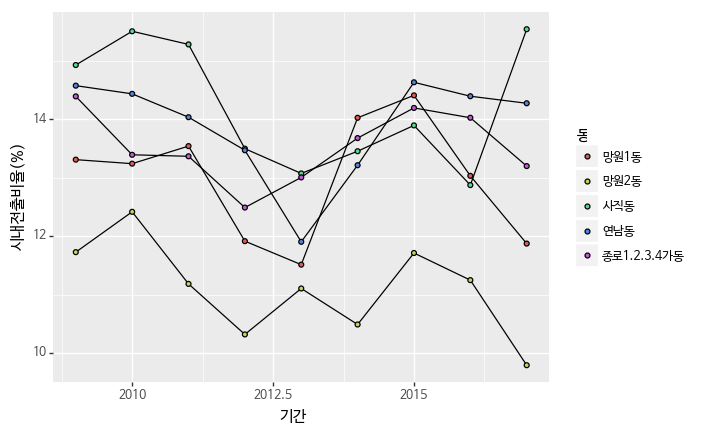

<ggplot: (-9223371908704526946)>

In [341]:
(ggplot(hots, aes(x='기간', y='시내전출비율(%)', group='동', fill='동'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [342]:
out_only[out_only['동'].str.contains('사직동')]

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%)
2,2009,종로구,사직동,10464.0,1562,402,1160,14.927370,3.841743,11.085627
452,2010,종로구,사직동,10668.0,1654,445,1209,15.504312,4.171354,11.332958
902,2011,종로구,사직동,10602.0,1620,487,1133,15.280136,4.593473,10.686663
1352,2012,종로구,사직동,10477.0,1414,417,997,13.496230,3.980147,9.516083
1801,2013,종로구,사직동,10327.0,1350,360,990,13.072528,3.486008,9.586521
2250,2014,종로구,사직동,10132.0,1363,360,1003,13.452428,3.553099,9.899329
2699,2015,종로구,사직동,10033.0,1394,364,1030,13.894149,3.628028,10.266122
3149,2016,종로구,사직동,10013.0,1289,301,988,12.873265,3.006092,9.867173
3599,2017,종로구,사직동,9717.0,1510,517,993,15.539776,5.320572,10.219203


In [343]:
unhip = out_only[out_only['동'].str.contains(r'(오륜동|^목5동|상계[12]동|명일2동|상도3동)')]
unhip.head(10)

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%)
179,2009,노원구,상계1동,41784.0,3429,1313,2116,8.206491,3.142351,5.064139
180,2009,노원구,상계2동,22614.0,3021,1788,1233,13.358981,7.906607,5.452375
255,2009,양천구,목5동,47091.0,5003,1992,3011,10.624111,4.230108,6.394003
328,2009,동작구,상도3동,24739.0,2854,1381,1473,11.536440,5.582279,5.954161
413,2009,송파구,오륜동,20967.0,2584,1096,1488,12.324128,5.227262,7.096867
435,2009,강동구,명일2동,19247.0,2652,1878,774,13.778771,9.757365,4.021406
629,2010,노원구,상계1동,44905.0,3229,1033,2196,7.190736,2.300412,4.890324
630,2010,노원구,상계2동,23283.0,2708,1571,1137,11.630804,6.747412,4.883391
705,2010,양천구,목5동,46647.0,4423,1578,2845,9.481853,3.382854,6.098999
778,2010,동작구,상도3동,25095.0,2847,1423,1424,11.344889,5.670452,5.674437


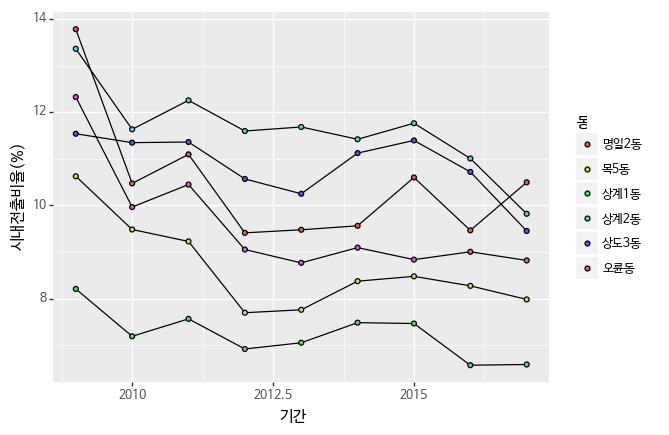

<ggplot: (128150082929)>

In [344]:
(ggplot(unhip, aes(x='기간', y='시내전출비율(%)', group='동', fill='동'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

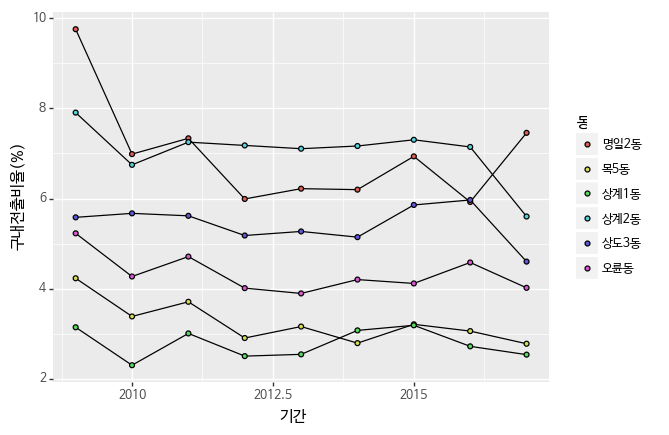

<ggplot: (-9223371908705789822)>

In [345]:
(ggplot(unhip, aes(x='기간', y='구내전출비율(%)', group='동', fill='동'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

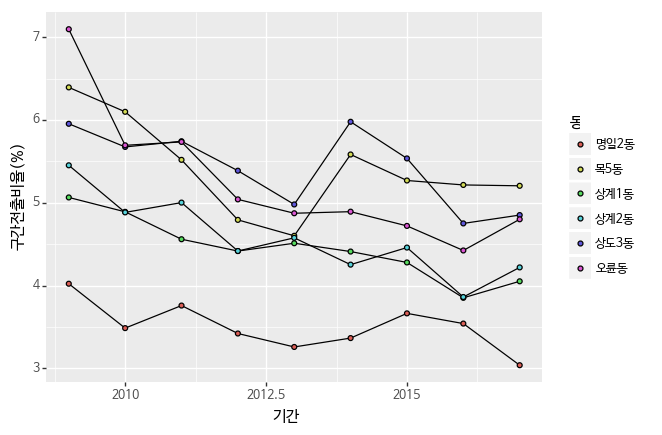

<ggplot: (128150246776)>

In [346]:
(ggplot(unhip, aes(x='기간', y='구간전출비율(%)', group='동', fill='동'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [347]:
total = out_only[out_only['동'].str.contains(r'연남동|사직동|종로1.2.3.4가동|망원1동|명일2동|^목5동|상계[12]동|상도3동|오륜동|명동|삼청동')]
total.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%)
2,2009,종로구,사직동,10464.0,1562,402,1160,14.927370,3.841743,11.085627
3,2009,종로구,삼청동,3717.0,593,191,402,15.953726,5.138553,10.815174
9,2009,종로구,종로1.2.3.4가동,8575.0,1234,218,1016,14.390671,2.542274,11.848397
23,2009,중구,명동,3508.0,388,47,341,11.060433,1.339795,9.720639
179,2009,노원구,상계1동,41784.0,3429,1313,2116,8.206491,3.142351,5.064139


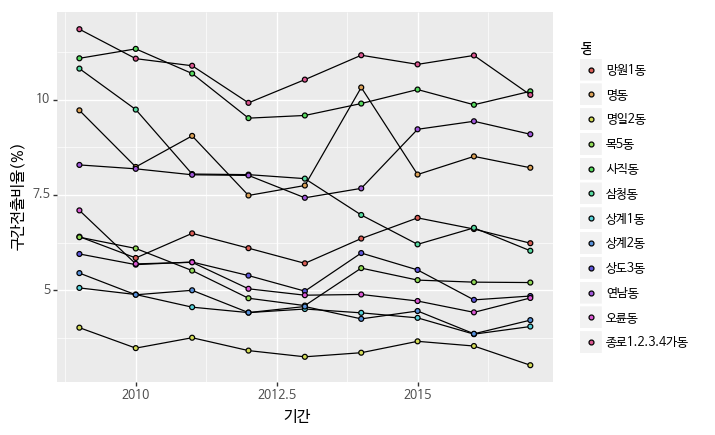

<ggplot: (128150438043)>

In [348]:
(ggplot(total, aes(x='기간', y='구간전출비율(%)', group='동', fill='동'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

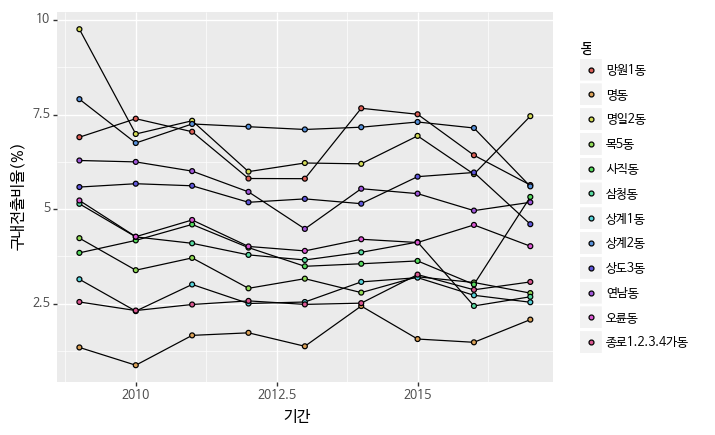

<ggplot: (128150438320)>

In [349]:
(ggplot(total, aes(x='기간', y='구내전출비율(%)', group='동', fill='동'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

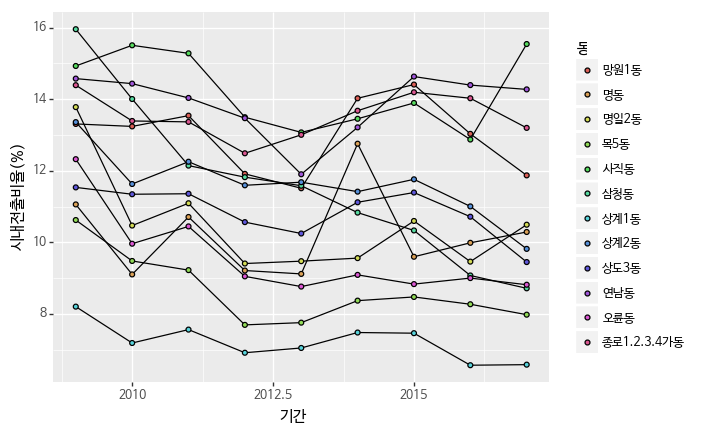

<ggplot: (128150164435)>

In [350]:
(ggplot(total, aes(x='기간', y='시내전출비율(%)', group='동', fill='동'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [351]:
out_only.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%)
0,2009,합계,합계,10464051.0,1286855,560864,725991,12.297866,5.359913,6.937954
1,2009,종로구,소계,177543.0,23957,5921,18036,13.493633,3.334967,10.158666
2,2009,종로구,사직동,10464.0,1562,402,1160,14.927370,3.841743,11.085627
3,2009,종로구,삼청동,3717.0,593,191,402,15.953726,5.138553,10.815174
4,2009,종로구,부암동,11602.0,1583,483,1100,13.644199,4.163075,9.481124


In [360]:
outs = out_only.drop(list(out_only[out_only['동'].str.contains(r'합계|총계|소계')].index)).reset_index().drop('index', axis=1)
outs.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),시내전출Bin
0,2009,종로구,사직동,10464.0,1562,402,1160,14.927370,3.841743,11.085627,1.0
1,2009,종로구,삼청동,3717.0,593,191,402,15.953726,5.138553,10.815174,1.0
2,2009,종로구,부암동,11602.0,1583,483,1100,13.644199,4.163075,9.481124,1.0
3,2009,종로구,평창동,19780.0,2239,403,1836,11.319515,2.037412,9.282103,NaN
4,2009,종로구,무악동,8714.0,1069,143,926,12.267615,1.641037,10.626578,1.0


In [398]:
outs[outs['시내전출비율(%)'] >= 100]

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%)
1666,2012,송파구,가락1동,6591.0,8222,5795,2427,124.745866,87.922925,36.822940
2089,2013,송파구,가락1동,1754.0,4102,3015,1087,233.865450,171.892816,61.972634
3808,2017,강동구,둔촌1동,1997.0,14000,7454,6546,701.051577,373.259890,327.791688


In [377]:
value_info = outs.iloc[:,7:].describe()
value_info

,시내전출비율(%),구내전출비율(%),구간전출비율(%)
count,3813.000000,3813.000000,3813.000000
mean,11.448874,5.030209,6.418664
std,12.354745,7.117832,5.806056
min,3.887364,0.352058,1.909236
25%,9.439455,3.499090,4.770597
50%,10.783163,4.593741,6.050542
75%,12.350863,5.972635,7.476802
max,701.051577,373.259890,327.791688


In [392]:
value_info.iloc[7][0]

701.0515773660491

In [485]:
outs['시내전출Bin'] = pd.cut(outs['시내전출비율(%)'], [value_info.iloc[3][0], value_info.iloc[4][0], value_info.iloc[5][0], value_info.iloc[6][0], 100, value_info.iloc[7][0]], labels=[4, 3, 2, 1, 'too high'])
outs['구내전출Bin'] = pd.cut(outs['시내전출비율(%)'], [value_info.iloc[3][1], value_info.iloc[4][1], value_info.iloc[5][1], value_info.iloc[6][1], 100, value_info.iloc[7][1]], labels=[4, 3, 2, 1, 'too high'])
outs['구간전출Bin'] = pd.cut(outs['시내전출비율(%)'], [value_info.iloc[3][2], value_info.iloc[4][2], value_info.iloc[5][2], value_info.iloc[6][2], 100, value_info.iloc[7][2]], labels=[4, 3, 2, 1, 'too high'])
outs.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),시내전출Bin,구내전출Bin,구간전출Bin
0,2009,종로구,사직동,10464.0,1562,402,1160,14.927370,3.841743,11.085627,1,1,1
1,2009,종로구,삼청동,3717.0,593,191,402,15.953726,5.138553,10.815174,1,1,1
2,2009,종로구,부암동,11602.0,1583,483,1100,13.644199,4.163075,9.481124,1,1,1
3,2009,종로구,평창동,19780.0,2239,403,1836,11.319515,2.037412,9.282103,2,1,1
4,2009,종로구,무악동,8714.0,1069,143,926,12.267615,1.641037,10.626578,2,1,1


In [486]:
outs[outs['동'].str.contains(r'연남동|사직동|종로1.2.3.4가동|망원1동')].sort_values(by=['동', '기간'])

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),시내전출Bin,구내전출Bin,구간전출Bin
213,2009,마포구,망원1동,24909.0,3315,1719,1596,13.308443,6.901120,6.407323,1,1,1
637,2010,마포구,망원1동,25114.0,3325,1856,1469,13.239627,7.390300,5.849327,1,1,1
1061,2011,마포구,망원1동,24867.0,3367,1752,1615,13.540033,7.045482,6.494551,1,1,1
1484,2012,마포구,망원1동,24534.0,2923,1425,1498,11.914078,5.808266,6.105812,2,1,1
1907,2013,마포구,망원1동,24174.0,2783,1403,1380,11.512369,5.803756,5.708613,2,1,1
2330,2014,마포구,망원1동,23402.0,3282,1794,1488,14.024442,7.666011,6.358431,1,1,1
2753,2015,마포구,망원1동,22751.0,3278,1708,1570,14.408158,7.507362,6.900796,1,1,1
3177,2016,마포구,망원1동,22292.0,2905,1432,1473,13.031581,6.423829,6.607752,1,1,1
3601,2017,마포구,망원1동,21790.0,2587,1228,1359,11.872419,5.635613,6.236806,2,1,1
0,2009,종로구,사직동,10464.0,1562,402,1160,14.927370,3.841743,11.085627,1,1,1


In [487]:
outs[outs['동'].str.contains(r'명일2동|^목5동|상계[12]동|상도3동|오륜동')].sort_values(by=['동', '기간'])

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),시내전출Bin,구내전출Bin,구간전출Bin
409,2009,강동구,명일2동,19247.0,2652,1878,774,13.778771,9.757365,4.021406,1,1,1
833,2010,강동구,명일2동,19139.0,2004,1337,667,10.470766,6.985736,3.485031,3,1,1
1257,2011,강동구,명일2동,18948.0,2102,1390,712,11.093519,7.335867,3.757653,2,1,1
1680,2012,강동구,명일2동,19064.0,1794,1142,652,9.410407,5.990348,3.420059,4,1,1
2103,2013,강동구,명일2동,18911.0,1792,1176,616,9.475966,6.218603,3.257363,3,1,1
2526,2014,강동구,명일2동,18784.0,1796,1164,632,9.561329,6.196763,3.364566,3,1,1
2950,2015,강동구,명일2동,18672.0,1979,1295,684,10.598757,6.935518,3.663239,3,1,1
3374,2016,강동구,명일2동,18503.0,1751,1096,655,9.463330,5.923364,3.539966,3,1,1
3798,2017,강동구,명일2동,18210.0,1911,1358,553,10.494234,7.457441,3.036793,3,1,1
239,2009,양천구,목5동,47091.0,5003,1992,3011,10.624111,4.230108,6.394003,3,1,1


In [489]:
outs[outs['동'].str.contains(r'명동|삼청동')].sort_values(by=['자치구', '동', '기간'])

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),시내전출Bin,구내전출Bin,구간전출Bin
1,2009,종로구,삼청동,3717.0,593,191,402,15.953726,5.138553,10.815174,1,1,1
425,2010,종로구,삼청동,3706.0,519,158,361,14.004317,4.263357,9.740961,1,1,1
849,2011,종로구,삼청동,3590.0,436,147,289,12.144847,4.094708,8.050139,2,1,1
1273,2012,종로구,삼청동,3485.0,412,132,280,11.822095,3.787661,8.034433,2,1,1
1696,2013,종로구,삼청동,3367.0,390,123,267,11.583012,3.653104,7.929908,2,1,1
2119,2014,종로구,삼청동,3268.0,354,126,228,10.832313,3.855569,6.976744,2,1,1
2542,2015,종로구,삼청동,3174.0,328,131,197,10.333963,4.127284,6.206679,3,1,1
2966,2016,종로구,삼청동,3118.0,283,76,207,9.076331,2.437460,6.638871,4,1,1
3390,2017,종로구,삼청동,3097.0,270,83,187,8.718114,2.680013,6.038101,4,1,1
20,2009,중구,명동,3508.0,388,47,341,11.060433,1.339795,9.720639,2,1,1


In [490]:
areas = outs['동'].unique().tolist()
areas

['사직동',
 '삼청동',
 '부암동',
 '평창동',
 '무악동',
 '교남동',
 '가회동',
 '종로1.2.3.4가동',
 '종로5·6가동',
 '이화동',
 '혜화동',
 '명륜3가동',
 '창신1동',
 '창신2동',
 '창신3동',
 '숭인1동',
 '숭인2동',
 '청운효자동',
 '소공동',
 '회현동',
 '명동',
 '필동',
 '장충동',
 '광희동',
 '을지로동',
 '신당1동',
 '신당2동',
 '신당3동',
 '신당4동',
 '신당5동',
 '신당6동',
 '황학동',
 '중림동',
 '후암동',
 '용산2가동',
 '남영동',
 '원효로2동',
 '효창동',
 '용문동',
 '이촌1동',
 '이촌2동',
 '이태원1동',
 '이태원2동',
 '서빙고동',
 '보광동',
 '청파동',
 '원효로1동',
 '한강로동',
 '한남동',
 '왕십리2동',
 '마장동',
 '사근동',
 '행당1동',
 '행당2동',
 '응봉동',
 '금호1가동',
 '금호4가동',
 '성수1가1동',
 '성수1가2동',
 '성수2가1동',
 '성수2가3동',
 '송정동',
 '용답동',
 '왕십리도선동',
 '금호2.3가동',
 '옥수동',
 '화양동',
 '군자동',
 '중곡1동',
 '중곡2동',
 '중곡3동',
 '중곡4동',
 '능동',
 '구의1동',
 '구의2동',
 '구의3동',
 '광장동',
 '자양1동',
 '자양2동',
 '자양3동',
 '자양4동',
 '회기동',
 '휘경1동',
 '휘경2동',
 '청량리동',
 '용신동',
 '제기동',
 '전농1동',
 '전농2동',
 '답십리1동',
 '답십리2동',
 '장안1동',
 '장안2동',
 '이문1동',
 '이문2동',
 '면목2동',
 '면목4동',
 '면목5동',
 '면목7동',
 '상봉1동',
 '상봉2동',
 '중화1동',
 '중화2동',
 '묵1동',
 '묵2동',
 '망우3동',
 '신내1동',
 '신내2동',
 '면목본동',
 '면목3.8동',
 '망우본동',
 '돈암1동

In [491]:
sorted_outs = outs.sort_values(by=['자치구', '동', '기간'])
sorted_outs = sorted_outs.reset_index().drop('index', axis=1)
sorted_outs.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),시내전출Bin,구내전출Bin,구간전출Bin
0,2009,강남구,개포1동,22439.0,2795,1351,1444,12.455992,6.020767,6.435224,1,1,1
1,2010,강남구,개포1동,22338.0,2556,1334,1222,11.442385,5.971886,5.470499,2,1,1
2,2011,강남구,개포1동,23764.0,2732,1451,1281,11.496381,6.105874,5.390507,2,1,1
3,2012,강남구,개포1동,23353.0,2197,1068,1129,9.407785,4.573288,4.834497,4,1,1
4,2013,강남구,개포1동,22869.0,2361,1166,1195,10.324019,5.098605,5.225414,3,1,1


In [492]:
null_areas = [area for area in areas if sorted_outs[sorted_outs['동'] == area].shape[0] < 9]

In [493]:
l = [list(sorted_outs[sorted_outs['동'] == area].index) for area in null_areas]
ls = []
for i in range(len(l)):
    for n in range(len(l[i])):
        ls.append(l[i][n])
len(ls)

96

In [494]:
outs.shape[0]

3813

In [495]:
temp = sorted_outs.drop(ls)
temp.shape

(3717, 13)

In [460]:
3717/9

413.0

In [498]:
well_outs = list()
for i in range(413):
    check = 0
    n = i*9
    for y in range(9):
        if temp.iloc[n,10] != 'too high' and temp.iloc[n,10] <= 2:
            check += 1
        n += 1
        
    if check == 9:
        well_outs.append(temp.iloc[i*9,2])
        
len(well_outs)

78

In [499]:
well_outs

['논현1동',
 '논현2동',
 '대치4동',
 '삼성1동',
 '삼성2동',
 '신사동',
 '역삼1동',
 '역삼2동',
 '청담동',
 '성내2동',
 '암사2동',
 '천호3동',
 '미아동',
 '번1동',
 '수유3동',
 '등촌1동',
 '낙성대동',
 '남현동',
 '대학동',
 '서림동',
 '서원동',
 '신림동',
 '신사동',
 '신원동',
 '중앙동',
 '청룡동',
 '행운동',
 '구의1동',
 '능동',
 '중곡1동',
 '중곡2동',
 '화양동',
 '구로3동',
 '상계10동',
 '회기동',
 '휘경1동',
 '사당1동',
 '사당4동',
 '사당5동',
 '상도2동',
 '신대방2동',
 '대흥동',
 '망원1동',
 '서강동',
 '서교동',
 '성산1동',
 '연남동',
 '합정동',
 '신촌동',
 '반포1동',
 '방배1동',
 '방배2동',
 '방배4동',
 '서초1동',
 '성수1가2동',
 '성수2가3동',
 '동선동',
 '보문동',
 '안암동',
 '방이2동',
 '송파1동',
 '잠실본동',
 '당산1동',
 '남영동',
 '원효로1동',
 '효창동',
 '응암3동',
 '사직동',
 '숭인1동',
 '숭인2동',
 '이화동',
 '종로1.2.3.4가동',
 '종로5·6가동',
 '을지로동',
 '장충동',
 '면목3.8동',
 '면목5동',
 '상봉2동']

In [501]:
temp[temp['동'] == '연남동']

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),시내전출Bin,구내전출Bin,구간전출Bin
1872,2009,마포구,연남동,20701.0,3017,1301,1716,14.574175,6.284721,8.289455,1,1,1
1873,2010,마포구,연남동,20777.0,2999,1298,1701,14.434230,6.247293,8.186937,1,1,1
1874,2011,마포구,연남동,20471.0,2873,1229,1644,14.034488,6.003615,8.030873,1,1,1
1875,2012,마포구,연남동,20202.0,2721,1102,1619,13.468963,5.454905,8.014058,1,1,1
1876,2013,마포구,연남동,20155.0,2399,902,1497,11.902754,4.475316,7.427437,2,1,1
1877,2014,마포구,연남동,19753.0,2610,1094,1516,13.213183,5.538399,7.674784,1,1,1
1878,2015,마포구,연남동,19157.0,2803,1036,1767,14.631727,5.407945,9.223782,1,1,1
1879,2016,마포구,연남동,18592.0,2676,922,1754,14.393287,4.959122,9.434165,1,1,1
1880,2017,마포구,연남동,17803.0,2541,922,1619,14.272875,5.178902,9.093973,1,1,1


In [561]:
out_values = temp.sort_values(by=['기간']).reset_index().drop('index', axis=1)
out_values.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),시내전출Bin,구내전출Bin,구간전출Bin
0,2009,강남구,개포1동,22439.0,2795,1351,1444,12.455992,6.020767,6.435224,1,1,1
1,2009,송파구,방이2동,25913.0,3896,2159,1737,15.034925,8.331725,6.703199,1,1,1
2,2009,금천구,독산3동,31944.0,2979,1127,1852,9.325695,3.528049,5.797646,4,1,1
3,2009,강북구,삼양동,33616.0,4230,2051,2179,12.583294,6.101261,6.482032,1,1,1
4,2009,은평구,증산동,22356.0,2356,1030,1326,10.538558,4.607264,5.931294,3,1,1


In [562]:
out_values = out_values.drop('시내전출Bin,구내전출Bin,구간전출Bin'.split(','),axis=1)
out_values.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%)
0,2009,강남구,개포1동,22439.0,2795,1351,1444,12.455992,6.020767,6.435224
1,2009,송파구,방이2동,25913.0,3896,2159,1737,15.034925,8.331725,6.703199
2,2009,금천구,독산3동,31944.0,2979,1127,1852,9.325695,3.528049,5.797646
3,2009,강북구,삼양동,33616.0,4230,2051,2179,12.583294,6.101261,6.482032
4,2009,은평구,증산동,22356.0,2356,1030,1326,10.538558,4.607264,5.931294


In [563]:
out_info = out_values.groupby('기간').mean().iloc[:,4:]
out_info

,시내전출비율(%),구내전출비율(%),구간전출비율(%)
기간,,,
2009,12.611411,5.360521,7.250890
2010,11.591546,4.886891,6.704655
2011,11.823783,5.155040,6.668743
2012,10.755667,4.707042,6.048625
2013,10.979280,4.878496,6.100784
2014,10.955581,4.812078,6.143503
2015,11.463364,5.231418,6.231947
2016,10.931618,4.948780,5.982838
2017,12.059368,5.456599,6.602769


In [564]:
years = [year for year in range(2009, 2018)]
d = dict()
for y, i in zip(years, out_info.values.tolist()):
    d[y] = i
d

{2009: [12.611411436793592, 5.360521168488156, 7.250890268305437],
 2010: [11.591545802788714, 4.8868907216510316, 6.704655081137673],
 2011: [11.823783189333001, 5.155040194365413, 6.66874299496758],
 2012: [10.755666933192094, 4.70704157244861, 6.048625360743492],
 2013: [10.97927995756912, 4.878495977722953, 6.100783979846162],
 2014: [10.955580932271392, 4.8120776218195935, 6.143503310451795],
 2015: [11.463364387846047, 5.231417522432105, 6.231946865413937],
 2016: [10.931618023671291, 4.9487804916917915, 5.982837531979499],
 2017: [12.05936755828728, 5.456598981976544, 6.602768576310741]}

In [565]:
out_values.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%)
0,2009,강남구,개포1동,22439.0,2795,1351,1444,12.455992,6.020767,6.435224
1,2009,송파구,방이2동,25913.0,3896,2159,1737,15.034925,8.331725,6.703199
2,2009,금천구,독산3동,31944.0,2979,1127,1852,9.325695,3.528049,5.797646
3,2009,강북구,삼양동,33616.0,4230,2051,2179,12.583294,6.101261,6.482032
4,2009,은평구,증산동,22356.0,2356,1030,1326,10.538558,4.607264,5.931294


In [536]:
out_values['구간전출'].iloc[3]

2179

In [542]:
d

{2009: [12.611411436793592, 5.360521168488156, 7.250890268305437],
 2010: [11.591545802788714, 4.8868907216510316, 6.704655081137673],
 2011: [11.823783189333001, 5.155040194365413, 6.66874299496758],
 2012: [10.755666933192094, 4.70704157244861, 6.048625360743492],
 2013: [10.97927995756912, 4.878495977722953, 6.100783979846162],
 2014: [10.955580932271392, 4.8120776218195935, 6.143503310451795],
 2015: [11.463364387846047, 5.231417522432105, 6.231946865413937],
 2016: [10.931618023671291, 4.9487804916917915, 5.982837531979499],
 2017: [12.05936755828728, 5.456598981976544, 6.602768576310741]}

In [ ]:
train.loc[train['FamilySize'] == 1, 'FsizeD'] = 'singleton'

In [572]:
n = 0
for col in '평균시내전출비율,평균구내전출비율,평균구간전출비율'.split(','):
    out_values[col] = pd.cut(out_values['기간'], [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], labels=[v[n] for v in d.values()])
    n += 1
out_values.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),평균시내전출비율,평균구내전출비율,평균구간전출비율
0,2009,강남구,개포1동,22439.0,2795,1351,1444,12.455992,6.020767,6.435224,12.611411,5.360521,7.25089
1,2009,송파구,방이2동,25913.0,3896,2159,1737,15.034925,8.331725,6.703199,12.611411,5.360521,7.25089
2,2009,금천구,독산3동,31944.0,2979,1127,1852,9.325695,3.528049,5.797646,12.611411,5.360521,7.25089
3,2009,강북구,삼양동,33616.0,4230,2051,2179,12.583294,6.101261,6.482032,12.611411,5.360521,7.25089
4,2009,은평구,증산동,22356.0,2356,1030,1326,10.538558,4.607264,5.931294,12.611411,5.360521,7.25089


In [578]:
out_values['평균시내전출비율,평균구내전출비율,평균구간전출비율'.split(',')] = out_values['평균시내전출비율,평균구내전출비율,평균구간전출비율'.split(',')].astype('float64')

In [581]:
out_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717 entries, 0 to 3716
Data columns (total 16 columns):
기간           3717 non-null int64
자치구          3717 non-null object
동            3717 non-null object
인구           3717 non-null float64
시내전출         3717 non-null int64
구내전출         3717 non-null int64
구간전출         3717 non-null int64
시내전출비율(%)    3717 non-null float64
구내전출비율(%)    3717 non-null float64
구간전출비율(%)    3717 non-null float64
평균시내전출비율     3717 non-null float64
평균구내전출비율     3717 non-null float64
평균구간전출비율     3717 non-null float64
평균대비 시내전출    0 non-null float64
평균대비 구내전출    0 non-null float64
평균대비 구간전출    0 non-null float64
dtypes: float64(10), int64(4), object(2)
memory usage: 464.7+ KB


In [582]:
cols = ['평균대비 시내전출', '평균대비 구내전출', '평균대비 구간전출']
for col in cols:
    out_values[col] = np.nan
for col in cols:
    out_values[col] = out_values['시내전출비율(%)'].values - out_values['평균시내전출비율'].values
out_values.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),평균시내전출비율,평균구내전출비율,평균구간전출비율,평균대비 시내전출,평균대비 구내전출,평균대비 구간전출
0,2009,강남구,개포1동,22439.0,2795,1351,1444,12.455992,6.020767,6.435224,12.611411,5.360521,7.25089,-0.155420,-0.155420,-0.155420
1,2009,송파구,방이2동,25913.0,3896,2159,1737,15.034925,8.331725,6.703199,12.611411,5.360521,7.25089,2.423513,2.423513,2.423513
2,2009,금천구,독산3동,31944.0,2979,1127,1852,9.325695,3.528049,5.797646,12.611411,5.360521,7.25089,-3.285716,-3.285716,-3.285716
3,2009,강북구,삼양동,33616.0,4230,2051,2179,12.583294,6.101261,6.482032,12.611411,5.360521,7.25089,-0.028118,-0.028118,-0.028118
4,2009,은평구,증산동,22356.0,2356,1030,1326,10.538558,4.607264,5.931294,12.611411,5.360521,7.25089,-2.072854,-2.072854,-2.072854


In [583]:
out_values.to_csv('out_values_1001.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
import re

In [3]:
df_out = pd.read_csv('out_values_1001.csv')
df_out.head()

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),평균시내전출비율,평균구내전출비율,평균구간전출비율,평균대비 시내전출,평균대비 구내전출,평균대비 구간전출
0,2009,강남구,개포1동,22439.0,2795,1351,1444,12.455992,6.020767,6.435224,12.611411,5.360521,7.25089,-0.155420,-0.155420,-0.155420
1,2009,송파구,방이2동,25913.0,3896,2159,1737,15.034925,8.331725,6.703199,12.611411,5.360521,7.25089,2.423513,2.423513,2.423513
2,2009,금천구,독산3동,31944.0,2979,1127,1852,9.325695,3.528049,5.797646,12.611411,5.360521,7.25089,-3.285716,-3.285716,-3.285716
3,2009,강북구,삼양동,33616.0,4230,2051,2179,12.583294,6.101261,6.482032,12.611411,5.360521,7.25089,-0.028118,-0.028118,-0.028118
4,2009,은평구,증산동,22356.0,2356,1030,1326,10.538558,4.607264,5.931294,12.611411,5.360521,7.25089,-2.072854,-2.072854,-2.072854


In [16]:
df_out[df_out['동'] == '연남동']

,기간,자치구,동,인구,시내전출,구내전출,구간전출,시내전출비율(%),구내전출비율(%),구간전출비율(%),평균시내전출비율,평균구내전출비율,평균구간전출비율,평균대비 시내전출,평균대비 구내전출,평균대비 구간전출
336,2009,마포구,연남동,20701.0,3017,1301,1716,14.574175,6.284721,8.289455,12.611411,5.360521,7.250890,1.962764,1.962764,1.962764
489,2010,마포구,연남동,20777.0,2999,1298,1701,14.434230,6.247293,8.186937,11.591546,4.886891,6.704655,2.842684,2.842684,2.842684
985,2011,마포구,연남동,20471.0,2873,1229,1644,14.034488,6.003615,8.030873,11.823783,5.155040,6.668743,2.210705,2.210705,2.210705
1356,2012,마포구,연남동,20202.0,2721,1102,1619,13.468963,5.454905,8.014058,10.755667,4.707042,6.048625,2.713297,2.713297,2.713297
1688,2013,마포구,연남동,20155.0,2399,902,1497,11.902754,4.475316,7.427437,10.979280,4.878496,6.100784,0.923474,0.923474,0.923474
2371,2014,마포구,연남동,19753.0,2610,1094,1516,13.213183,5.538399,7.674784,10.955581,4.812078,6.143503,2.257602,2.257602,2.257602
2864,2015,마포구,연남동,19157.0,2803,1036,1767,14.631727,5.407945,9.223782,11.463364,5.231418,6.231947,3.168363,3.168363,3.168363
3025,2016,마포구,연남동,18592.0,2676,922,1754,14.393287,4.959122,9.434165,10.931618,4.948780,5.982838,3.461669,3.461669,3.461669
3397,2017,마포구,연남동,17803.0,2541,922,1619,14.272875,5.178902,9.093973,12.059368,5.456599,6.602769,2.213508,2.213508,2.213508


In [9]:
df_out[df_out['동'] == ']동'].iloc[:, 13:].describe()

,평균대비 시내전출,평균대비 구내전출,평균대비 구간전출
count,9.000000,9.000000,9.000000
mean,2.380858,2.380858,2.380858
std,0.936234,0.936234,0.936234
min,0.477706,0.477706,0.477706
25%,1.980586,1.980586,1.980586
50%,2.610021,2.610021,2.610021
75%,2.661523,2.661523,2.661523
max,3.924333,3.924333,3.924333


In [10]:
df_out[df_out['동'] == '종로1.2.3.4가동'].iloc[:, 13:].describe()

,평균대비 시내전출,평균대비 구내전출,평균대비 구간전출
count,9.000000,9.000000,9.000000
mean,2.062642,2.062642,2.062642
std,0.644762,0.644762,0.644762
min,1.138956,1.138956,1.138956
25%,1.733202,1.733202,1.733202
50%,1.800043,1.800043,1.800043
75%,2.721549,2.721549,2.721549
max,3.093820,3.093820,3.093820


In [14]:
df_out[df_out['동'] == '삼청동'].iloc[:, 13:].describe()

,평균대비 시내전출,평균대비 구내전출,평균대비 구간전출
count,9.000000,9.000000,9.000000
mean,0.144122,0.144122,0.144122
std,2.070846,2.070846,2.070846
min,-3.341253,-3.341253,-3.341253
25%,-1.129401,-1.129401,-1.129401
50%,0.321064,0.321064,0.321064
75%,1.066428,1.066428,1.066428
max,3.342315,3.342315,3.342315


In [15]:
df_out[df_out['동'] == '명동'].iloc[:, 13:].describe()

,평균대비 시내전출,평균대비 구내전출,평균대비 구간전출
count,9.000000,9.000000,9.000000
mean,-1.258293,-1.258293,-1.258293
std,1.231573,1.231573,1.231573
min,-2.485266,-2.485266,-2.485266
25%,-1.858921,-1.858921,-1.858921
50%,-1.550978,-1.550978,-1.550978
75%,-1.113854,-1.113854,-1.113854
max,1.800368,1.800368,1.800368


In [11]:
df_out[df_out['동'] == '상계1동'].iloc[:, 13:].describe()

,평균대비 시내전출,평균대비 구내전출,평균대비 구간전출
count,9.000000,9.000000,9.000000
mean,-4.237117,-4.237117,-4.237117
std,0.558746,0.558746,0.558746
min,-5.473446,-5.473446,-5.473446
25%,-4.400810,-4.400810,-4.400810
50%,-4.258861,-4.258861,-4.258861
75%,-3.927110,-3.927110,-3.927110
max,-3.472180,-3.472180,-3.472180


In [12]:
df_out[df_out['동'] == '대방동'].iloc[:, 13:].describe()

,평균대비 시내전출,평균대비 구내전출,평균대비 구간전출
count,9.000000,9.000000,9.000000
mean,-1.124645,-1.124645,-1.124645
std,0.745614,0.745614,0.745614
min,-2.674843,-2.674843,-2.674843
25%,-1.349478,-1.349478,-1.349478
50%,-1.127407,-1.127407,-1.127407
75%,-0.681402,-0.681402,-0.681402
max,0.057358,0.057358,0.057358


In [13]:
df_out[df_out['동'] == '명일2동'].iloc[:, 13:].describe()

,평균대비 시내전출,평균대비 구내전출,평균대비 구간전출
count,9.000000,9.000000,9.000000
mean,-0.980504,-0.980504,-0.980504
std,0.856325,0.856325,0.856325
min,-1.565134,-1.565134,-1.565134
25%,-1.468288,-1.468288,-1.468288
50%,-1.345260,-1.345260,-1.345260
75%,-0.864607,-0.864607,-0.864607
max,1.167359,1.167359,1.167359
